In [115]:
#!wget http://www.kasprowski.pl/datasets/emvic.zip

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif,chi2,f_regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB

In [117]:
data = pd.read_csv("emvic.data",sep="\t", header = None)
data

const_values = data.columns[data.nunique() == 1]
data.drop(columns=const_values, inplace=True)

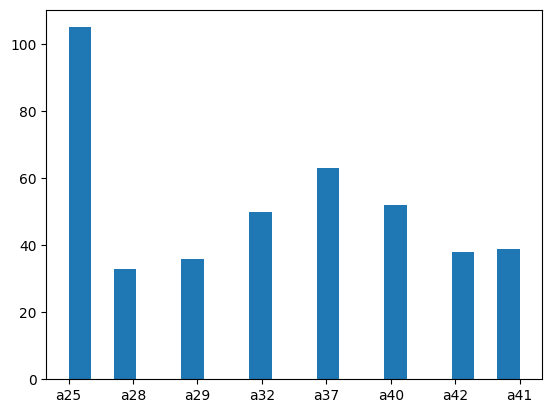

In [118]:
#data.values[0:2,1000:1200]
samples = data.values[:,1:]
labels = data.values[:,0]


plt.hist(labels,bins=20)
plt.show()

In [119]:
# datanp = np.array(data)

# datanp
# a25 = datanp[datanp[:, 0] == "a25", 1:]
# a25

# a250 = a25[a25!=0]
# plt.hist(a250,bins=100)
# plt.show()

In [120]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


In [121]:
def RPredict(samples,labels_encoded):

  for n in range(10):
      i = random.randrange(len(labels_encoded))
      predicted = model.predict(samples[i].reshape(1,-1))
      print(n," predicted",predicted[0], "real",labels_encoded[i], end=' ')
      if(predicted[0]==labels_encoded[i]):
          print("correct")
      else:
          print("wrong")

In [122]:
def dataSplit(samples,labels):
  # train-test split
  (trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, stratify=labels,random_state=1)
  model.fit(trainSamples, trainLabels)

  correct = 0;
  predictedLabels = model.predict(testSamples)
  for i in range(len(testSamples)):
      #print("real:",testLabels[i],"predicted:",predictedLabels[i])
      if(testLabels[i]==predictedLabels[i]):
          correct = correct + 1
  print("Correct:",correct," of ",len(testSamples)," accuracy=",correct/len(testSamples))

  return testSamples,testLabels

In [123]:
def calRatings(testSamples,testLabels):

  modelResults = model.predict(testSamples)
  print(confusion_matrix(testLabels, modelResults))
  print(classification_report(testLabels, modelResults))
  accuracy = accuracy_score(testLabels, modelResults)
  print("Accuracy: {:.2f}".format(accuracy))
  print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults)))
  return testLabels, modelResults

In [124]:
def testLabelEncoder(testLabels,modelResults):
  test_label_encoder = LabelEncoder()
  test_labels_encoded = test_label_encoder.fit_transform(testLabels)
  test_labels_encoded

  test_modelResults_encoder = LabelEncoder()
  test_modelResults_encoded = test_modelResults_encoder.fit_transform(modelResults)
  test_modelResults_encoded

  return test_labels_encoded, test_modelResults_encoded

In [125]:
def MSER2(test_labels_encoded, test_modelResults_encoded):
  print('MSE=',mean_squared_error(test_labels_encoded, test_modelResults_encoded))
  print('R2=',r2_score(test_labels_encoded, test_modelResults_encoded),"\n")

In [126]:
def Classification(samples, labels_encoded):

  RPredict(samples,labels_encoded)
  testSamples, testLabels = dataSplit(samples, labels)
  testLabels, modelResults = calRatings(testSamples, testLabels)
  test_labels_encoded, test_modelResults_encoded =  testLabelEncoder(testLabels, modelResults)
  MSER2(test_labels_encoded,test_modelResults_encoded)

In [127]:
print(samples)

[[0 0 0 ... -19 -22 -23]
 [0 0 0 ... -67 -67 -70]
 [0 0 0 ... -53 -52 -54]
 ...
 [0 0 0 ... 229 227 226]
 [0 0 0 ... 446 445 445]
 [0 0 0 ... 575 577 578]]


In [128]:
#--------------------1--------------------#
model = KNeighborsClassifier()
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)


0  predicted 0 real 0 correct
1  predicted 0 real 0 correct
2  predicted 4 real 4 correct
3  predicted 0 real 0 correct
4  predicted 5 real 5 correct
5  predicted 4 real 4 correct
6  predicted 0 real 7 wrong
7  predicted 0 real 0 correct
8  predicted 0 real 0 correct
9  predicted 3 real 3 correct
Correct: 57  of  104  accuracy= 0.5480769230769231
[[22  0  0  1  0  1  0  2]
 [ 0  3  3  0  1  1  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 1  0  1  5  1  0  0  4]
 [ 1  1  3  2  7  0  1  1]
 [ 2  0  0  1  0  8  0  2]
 [ 0  3  1  1  2  0  2  1]
 [ 2  2  1  1  2  0  1  1]]
              precision    recall  f1-score   support

         a25       0.79      0.85      0.81        26
         a28       0.33      0.38      0.35         8
         a29       0.50      1.00      0.67         9
         a32       0.45      0.42      0.43        12
         a37       0.54      0.44      0.48        16
         a40       0.80      0.62      0.70        13
         a41       0.50      0.20      0.29        10
 

In [129]:
#--------------------2--------------------#
# TOP 3 CLASSIFAIER
model = LinearDiscriminantAnalysis()
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)
sklearn.model_selection.cross_validate(model, samples, labels_encoded, cv=10)

0  predicted 2 real 2 correct
1  predicted 1 real 1 correct
2  predicted 5 real 5 correct
3  predicted 0 real 0 correct
4  predicted 7 real 7 correct
5  predicted 0 real 0 correct
6  predicted 2 real 2 correct
7  predicted 3 real 3 correct
8  predicted 0 real 0 correct
9  predicted 1 real 1 correct
Correct: 94  of  104  accuracy= 0.9038461538461539
[[26  0  0  0  0  0  0  0]
 [ 0  6  2  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  1  0 13  0  1  1]
 [ 0  0  0  0  1 11  1  0]
 [ 1  1  0  0  0  0  8  0]
 [ 0  1  0  0  0  0  0  9]]
              precision    recall  f1-score   support

         a25       0.96      1.00      0.98        26
         a28       0.75      0.75      0.75         8
         a29       0.75      1.00      0.86         9
         a32       1.00      1.00      1.00        12
         a37       0.93      0.81      0.87        16
         a40       1.00      0.85      0.92        13
         a41       0.80      0.80      0.80        10

{'fit_time': array([2.10438704, 1.44384241, 2.20352578, 2.75827384, 1.4635632 ,
        2.19127941, 2.65758967, 1.59120655, 1.43760204, 1.45630193]),
 'score_time': array([0.0580411 , 0.06602454, 0.11521029, 0.10017109, 0.05097747,
        0.1160233 , 0.09512687, 0.07142115, 0.04917645, 0.04863071]),
 'test_score': array([0.85714286, 0.95238095, 0.88095238, 0.92857143, 0.97619048,
        0.85714286, 0.7804878 , 0.87804878, 0.92682927, 0.85365854])}

In [130]:
#--------------------2.5--------------------#
# TOP 3 CLASSIFAIER

for i in range (1,11):

  Knumber = i*800
  print("Number of samples = ", Knumber, "\n")
  BS = SelectKBest(score_func=f_classif, k = Knumber)
  BS_samples = BS.fit_transform(samples, labels_encoded)

  model = LinearDiscriminantAnalysis()
  model.fit(BS_samples, labels_encoded)
  Classification(BS_samples, labels_encoded)
  sklearn.model_selection.cross_validate(model, BS_samples, labels_encoded, cv=10)



Number of samples =  800 

0  predicted 3 real 3 correct
1  predicted 5 real 5 correct
2  predicted 6 real 6 correct
3  predicted 2 real 2 correct
4  predicted 0 real 0 correct
5  predicted 1 real 1 correct
6  predicted 1 real 1 correct
7  predicted 0 real 0 correct
8  predicted 3 real 3 correct
9  predicted 5 real 5 correct
Correct: 62  of  104  accuracy= 0.5961538461538461
[[21  0  0  3  2  0  0  0]
 [ 1  4  2  0  0  0  0  1]
 [ 0  0  6  0  2  0  1  0]
 [ 3  2  0  7  0  0  0  0]
 [ 0  0  1  6  9  0  0  0]
 [ 0  2  0  1  1  9  0  0]
 [ 1  1  0  1  2  0  5  0]
 [ 2  2  0  4  1  0  0  1]]
              precision    recall  f1-score   support

         a25       0.75      0.81      0.78        26
         a28       0.36      0.50      0.42         8
         a29       0.67      0.67      0.67         9
         a32       0.32      0.58      0.41        12
         a37       0.53      0.56      0.55        16
         a40       1.00      0.69      0.82        13
         a41       0.83   

In [131]:
#--------------------3--------------------#
model = GaussianNB()
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)

0  predicted 2 real 2 correct
1  predicted 2 real 1 wrong
2  predicted 4 real 5 wrong
3  predicted 3 real 0 wrong
4  predicted 3 real 3 correct
5  predicted 1 real 1 correct
6  predicted 3 real 6 wrong
7  predicted 1 real 7 wrong
8  predicted 2 real 2 correct
9  predicted 6 real 5 wrong
Correct: 50  of  104  accuracy= 0.4807692307692308
[[17  1  2  4  1  1  0  0]
 [ 0  2  6  0  0  0  0  0]
 [ 0  1  7  0  1  0  0  0]
 [ 1  0  0  9  2  0  0  0]
 [ 0  0  4  3  5  1  1  2]
 [ 2  1  0  0  4  3  0  3]
 [ 1  3  0  1  1  0  3  1]
 [ 0  2  1  1  2  0  0  4]]
              precision    recall  f1-score   support

         a25       0.81      0.65      0.72        26
         a28       0.20      0.25      0.22         8
         a29       0.35      0.78      0.48         9
         a32       0.50      0.75      0.60        12
         a37       0.31      0.31      0.31        16
         a40       0.60      0.23      0.33        13
         a41       0.75      0.30      0.43        10
         a4

In [132]:
#--------------------4--------------------#
model = DecisionTreeClassifier()
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)

0  predicted 0 real 0 correct
1  predicted 4 real 4 correct
2  predicted 3 real 3 correct
3  predicted 5 real 5 correct
4  predicted 7 real 7 correct
5  predicted 2 real 2 correct
6  predicted 0 real 0 correct
7  predicted 0 real 0 correct
8  predicted 4 real 4 correct
9  predicted 1 real 1 correct
Correct: 51  of  104  accuracy= 0.49038461538461536
[[18  1  0  5  1  0  1  0]
 [ 0  4  2  0  1  0  1  0]
 [ 1  0  5  0  1  1  0  1]
 [ 2  0  1  6  1  0  1  1]
 [ 2  1  1  1  4  2  2  3]
 [ 0  2  0  0  0 10  1  0]
 [ 1  0  1  0  2  3  2  1]
 [ 1  0  0  3  3  0  1  2]]
              precision    recall  f1-score   support

         a25       0.72      0.69      0.71        26
         a28       0.50      0.50      0.50         8
         a29       0.50      0.56      0.53         9
         a32       0.40      0.50      0.44        12
         a37       0.31      0.25      0.28        16
         a40       0.62      0.77      0.69        13
         a41       0.22      0.20      0.21        1

In [133]:
#--------------------5--------------------#
model = RandomForestClassifier()
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)

0  predicted 0 real 0 correct
1  predicted 0 real 0 correct
2  predicted 0 real 0 correct
3  predicted 4 real 4 correct
4  predicted 4 real 4 correct
5  predicted 2 real 2 correct
6  predicted 6 real 6 correct
7  predicted 5 real 5 correct
8  predicted 0 real 0 correct
9  predicted 0 real 0 correct
Correct: 84  of  104  accuracy= 0.8076923076923077
[[26  0  0  0  0  0  0  0]
 [ 0  5  2  0  1  0  0  0]
 [ 1  0  8  0  0  0  0  0]
 [ 1  0  0  8  2  0  0  1]
 [ 0  0  0  0 13  0  1  2]
 [ 0  0  0  1  0 11  1  0]
 [ 0  0  0  0  0  0  9  1]
 [ 2  0  0  0  4  0  0  4]]
              precision    recall  f1-score   support

         a25       0.87      1.00      0.93        26
         a28       1.00      0.62      0.77         8
         a29       0.80      0.89      0.84         9
         a32       0.89      0.67      0.76        12
         a37       0.65      0.81      0.72        16
         a40       1.00      0.85      0.92        13
         a41       0.82      0.90      0.86        10

In [134]:
#--------------------6--------------------#
# TOP 3 CLASSIFAIER
model = LogisticRegression(max_iter=1000)
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)
sklearn.model_selection.cross_validate(model, samples, labels_encoded, cv=10)

0  predicted 0 real 0 correct
1  predicted 0 real 0 correct
2  predicted 0 real 0 correct
3  predicted 0 real 0 correct
4  predicted 4 real 4 correct
5  predicted 6 real 6 correct
6  predicted 0 real 0 correct
7  predicted 2 real 2 correct
8  predicted 4 real 4 correct
9  predicted 5 real 5 correct
Correct: 97  of  104  accuracy= 0.9326923076923077
[[26  0  0  0  0  0  0  0]
 [ 0  6  2  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 11  0  0  1  0]
 [ 0  0  1  0 14  0  0  1]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  1  0  9  0]
 [ 1  0  0  0  0  0  0  9]]
              precision    recall  f1-score   support

         a25       0.96      1.00      0.98        26
         a28       1.00      0.75      0.86         8
         a29       0.75      1.00      0.86         9
         a32       1.00      0.92      0.96        12
         a37       0.93      0.88      0.90        16
         a40       1.00      1.00      1.00        13
         a41       0.90      0.90      0.90        10

{'fit_time': array([11.52529049, 12.50741768, 11.9112215 , 11.76411796, 10.59855771,
        11.39388514, 11.32509136, 11.36821461, 10.5798223 , 11.0445466 ]),
 'score_time': array([0.1060605 , 0.08824372, 0.05040812, 0.13627434, 0.13396096,
        0.10211539, 0.04809809, 0.09540915, 0.12755108, 0.06573749]),
 'test_score': array([0.88095238, 0.95238095, 0.92857143, 0.97619048, 0.85714286,
        0.85714286, 0.82926829, 0.95121951, 0.95121951, 0.90243902])}

In [135]:
#--------------------6.5--------------------#
# TOP 3 CLASSIFAIER

model = LogisticRegression(max_iter=1000)
BS = SelectFromModel(model)
BS_samples = BS.fit_transform(samples,labels_encoded)
model.fit(BS_samples, labels_encoded)
Classification(BS_samples, labels_encoded)
sklearn.model_selection.cross_validate(model, BS_samples, labels_encoded, cv=10)

0  predicted 1 real 1 correct
1  predicted 5 real 5 correct
2  predicted 4 real 4 correct
3  predicted 5 real 5 correct
4  predicted 5 real 5 correct
5  predicted 6 real 6 correct
6  predicted 1 real 1 correct
7  predicted 4 real 4 correct
8  predicted 0 real 0 correct
9  predicted 0 real 0 correct
Correct: 96  of  104  accuracy= 0.9230769230769231
[[26  0  0  0  0  0  0  0]
 [ 0  6  2  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 11  0  0  1  0]
 [ 0  0  1  0 14  0  0  1]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  2  0  8  0]
 [ 1  0  0  0  0  0  0  9]]
              precision    recall  f1-score   support

         a25       0.96      1.00      0.98        26
         a28       1.00      0.75      0.86         8
         a29       0.75      1.00      0.86         9
         a32       1.00      0.92      0.96        12
         a37       0.88      0.88      0.88        16
         a40       1.00      1.00      1.00        13
         a41       0.89      0.80      0.84        10

{'fit_time': array([3.27628279, 2.9109993 , 3.57333565, 5.19638133, 3.53063583,
        3.05901599, 3.37710214, 4.86342788, 3.41300321, 3.25388432]),
 'score_time': array([0.02144933, 0.04166555, 0.02130294, 0.04686165, 0.04284835,
        0.03952575, 0.03991556, 0.02048802, 0.02073956, 0.02046776]),
 'test_score': array([0.9047619 , 0.95238095, 0.95238095, 0.95238095, 0.88095238,
        0.83333333, 0.87804878, 0.95121951, 0.92682927, 0.95121951])}

In [136]:
#--------------------7--------------------#
# TOP 3 CLASSIFAIER
model = SVC(kernel='linear', C=1, class_weight='balanced')
model.fit(samples, labels_encoded)
Classification(samples, labels_encoded)
sklearn.model_selection.cross_validate(model, samples, labels_encoded, cv=10)

0  predicted 6 real 6 correct
1  predicted 2 real 2 correct
2  predicted 4 real 4 correct
3  predicted 0 real 0 correct
4  predicted 0 real 0 correct
5  predicted 6 real 6 correct
6  predicted 0 real 0 correct
7  predicted 5 real 5 correct
8  predicted 4 real 4 correct
9  predicted 4 real 4 correct
Correct: 93  of  104  accuracy= 0.8942307692307693
[[26  0  0  0  0  0  0  0]
 [ 0  6  2  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 11  0  0  1  0]
 [ 0  0  1  0 13  0  0  2]
 [ 0  0  0  0  0 12  1  0]
 [ 0  1  0  0  1  0  8  0]
 [ 1  0  0  0  1  0  0  8]]
              precision    recall  f1-score   support

         a25       0.96      1.00      0.98        26
         a28       0.86      0.75      0.80         8
         a29       0.75      1.00      0.86         9
         a32       1.00      0.92      0.96        12
         a37       0.87      0.81      0.84        16
         a40       1.00      0.92      0.96        13
         a41       0.80      0.80      0.80        10

{'fit_time': array([0.73039675, 0.87284541, 0.86540365, 0.88100863, 0.86744618,
        0.6687417 , 0.67347527, 0.6709559 , 0.68483305, 0.68086004]),
 'score_time': array([0.09690285, 0.09197044, 0.09171033, 0.09403539, 0.0710628 ,
        0.07163906, 0.0763967 , 0.06951451, 0.07226515, 0.07107329]),
 'test_score': array([0.78571429, 0.9047619 , 0.88095238, 0.95238095, 0.85714286,
        0.83333333, 0.90243902, 0.87804878, 0.95121951, 0.92682927])}

In [137]:
#--------------------7.5--------------------#
# TOP 3 CLASSIFAIER
model = SVC(kernel='linear', C=1, class_weight='balanced')
BS = SelectFromModel(model)
BS_samples = BS.fit_transform(samples,labels_encoded)
model.fit(BS_samples, labels_encoded)
Classification(BS_samples, labels_encoded)
sklearn.model_selection.cross_validate(model, BS_samples, labels_encoded, cv=10)


0  predicted 1 real 1 correct
1  predicted 1 real 1 correct
2  predicted 0 real 0 correct
3  predicted 5 real 5 correct
4  predicted 0 real 0 correct
5  predicted 0 real 0 correct
6  predicted 7 real 7 correct
7  predicted 7 real 7 correct
8  predicted 0 real 0 correct
9  predicted 4 real 4 correct
Correct: 92  of  104  accuracy= 0.8846153846153846
[[26  0  0  0  0  0  0  0]
 [ 0  5  2  0  1  0  0  0]
 [ 0  0  9  0  0  0  0  0]
 [ 0  0  0 11  0  0  1  0]
 [ 0  0  1  0 14  0  0  1]
 [ 0  0  0  1  0 11  1  0]
 [ 0  1  0  0  1  0  8  0]
 [ 2  0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

         a25       0.93      1.00      0.96        26
         a28       0.83      0.62      0.71         8
         a29       0.75      1.00      0.86         9
         a32       0.92      0.92      0.92        12
         a37       0.88      0.88      0.88        16
         a40       1.00      0.85      0.92        13
         a41       0.80      0.80      0.80        10

{'fit_time': array([0.31471992, 0.31078243, 0.3328743 , 0.30869079, 0.31366849,
        0.31830215, 0.32345629, 0.32068634, 0.31630468, 0.32786393]),
 'score_time': array([0.03268433, 0.03339887, 0.03178382, 0.03222275, 0.03133535,
        0.03141785, 0.03171611, 0.03876591, 0.03277183, 0.03221083]),
 'test_score': array([0.76190476, 0.88095238, 0.92857143, 0.95238095, 0.85714286,
        0.85714286, 0.85365854, 0.90243902, 0.90243902, 0.87804878])}